In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import matplotlib
matplotlib.__version__

'3.3.2'

## Engineering

In [68]:
df = pd.read_csv('data/covid_19_data.csv')
qc = df[df['Province/State'] == 'Quebec'].copy().reset_index()
qc['ObservationDate'] = pd.to_datetime(qc['ObservationDate'])
qc['ObsDateMs'] = pd.to_datetime(qc['ObservationDate'], unit='ms')

"""
Calculating daily change
"""
qc.loc[0, 'DailyDeaths'] = qc.loc[0, 'Deaths']
qc.loc[0, 'DailyConfirmed'] = qc.loc[0, 'Confirmed']
for i in range(1, len(qc)):
    changeD = qc.loc[i, 'Deaths'] - qc.loc[i-1, 'Deaths'] 
    changeC = qc.loc[i, 'Confirmed'] - qc.loc[i-1, 'Confirmed'] 
    qc.loc[i, 'DailyDeaths'] = changeD if changeD >= 0 else 0
    qc.loc[i, 'DailyConfirmed'] = changeC if changeC >= 0 else 0

"""
We have random daily spikes of ~8000 cases for a given day, 
We'll isolate those based on Bing's chart, which shows a max count of
daily cases of approx 4000.
https://www.bing.com/covid/local/quebec_canada
"""
qc = qc[qc['DailyConfirmed'] <= 4000]

"""
To make up for internal factors of the reporting system
of cases, we'll remove 0 DailyConfirmed rows.
"""
qc = qc[qc['DailyConfirmed'] > 0]

imp_dates = ['20/3/2020', '31/8/2020','25/12/2020']
# qc

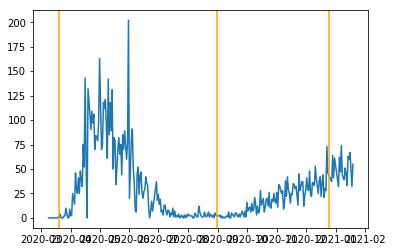

In [69]:
plt.plot(qc['ObservationDate'],qc['DailyDeaths'])
for d in imp_dates:
    plt.axvline(x=pd.to_datetime(d), color='orange')
plt.show()

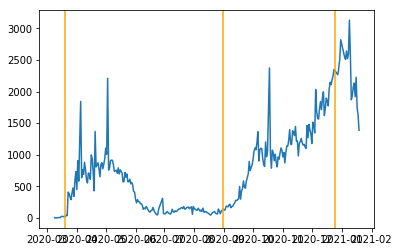

In [72]:
plt.plot(qc['ObservationDate'],qc['DailyConfirmed'])
for d in imp_dates:
    plt.axvline(x=pd.to_datetime(d), color='orange')
plt.show()

## Split and fit

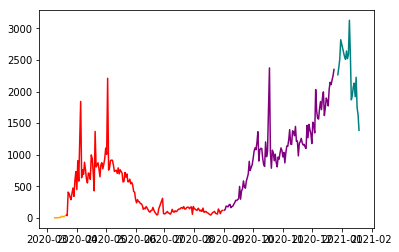

In [76]:
first = qc[qc['ObservationDate'] < imp_dates[0]]
second = qc[(qc['ObservationDate'] > imp_dates[0]) & (qc['ObservationDate'] < imp_dates[1])]
third = qc[(qc['ObservationDate'] > imp_dates[1]) & (qc['ObservationDate'] < imp_dates[2])]
fourth = qc[qc['ObservationDate'] > imp_dates[2]]

sets = [first, second, third, fourth]
colors = ['orange', 'red', 'purple', 'teal']
fit_colors = ['orange', 'red', 'purple', 'teal']

for i in range(len(sets)):
    x = sets[i]['ObservationDate']
    y = sets[i]['DailyConfirmed']
    
    plt.plot(x,y, color=colors[i])
